# The Battle Of Neighborhoods

## Importing all the libraries required

In [2]:
# for data cleaning and wrangling
import pandas as pd
import numpy as np

# for various visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for retrive the location coordinates for various locations
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

# for plotting the neighborhoods on the map
import folium

# for handling requests 
import requests  

# for clustering
from sklearn.cluster import KMeans

# for plotting different clusters in different colors
import matplotlib.cm as cm
import matplotlib.colors as colors

# for evaluation and chosing the optimum K means clustering model
! pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer 

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

## Getting the regions and neighborhoods in Bangalore

In [3]:
central = ['Cantonment', 'Domlur', 'Indiranagar', 'Jeevanbheemanagar', 'Malleswaram', 'Pete', 'Sadashivanagar', 'Seshadripuram', 'Shivajinagar', 'Ulsoor', 'Vasanth Nagar']
central_region = []

for i in range(len(central)):
    
    central_region.append('Central')

central_df = pd.DataFrame({'Region':central_region, 'Neighborhood': central})


In [4]:
eastern = ['Bellandur', 'CV Raman Nagar', 'Hoodi', 'Krishnarajapuram', 'Mahadevapura', 'Marathahalli', 'Varthur', 'Whitefield']
eastern_region = []

for i in range(len(eastern)):
    
    eastern_region.append('Eastern')

eastern_df = pd.DataFrame({'Region':eastern_region, 'Neighborhood': eastern})

In [5]:
north_eastern = ['Banaswadi', 'HBR Layout', 'Horamavu', 'Kalyan Nagar', 'Kammanahalli', 'Lingarajapuram', 'Ramamurthy Nagar']
north_eastern_region = []

for i in range(len(north_eastern)):
    
    north_eastern_region.append('North Eastern')

north_eastern_df = pd.DataFrame({'Region':north_eastern_region, 'Neighborhood': north_eastern})

In [6]:
northern = ['Hebbal', 'Jalahalli', 'Mathikere', 'Peenya', 'R. T. Nagar', 'Vidyaranyapura', 'Yelahanka', 'Yeshwanthpur']
northern_region = []

for i in range(len(northern)):
    
    northern_region.append('Northern')

northern_df = pd.DataFrame({'Region':northern_region, 'Neighborhood': northern})

In [7]:
south_eastern = ['Bommanahalli', 'Bommasandra' , 'BTM Layout', 'Electronic City', 'HSR Layout', 'Koramangala', 'Madiwala']
south_eastern_region = []

for i in range(len(south_eastern)):
    
    south_eastern_region.append('South Eastern')

south_eastern_df = pd.DataFrame({'Region':south_eastern_region, 'Neighborhood': south_eastern})

In [8]:
southern = ['Banashankari', 'Basavanagudi', 'Girinagar', 'J. P. Nagar', 'Jayanagar', 'Kumaraswamy Layout', 'Padmanabhanagar', 'Uttarahalli']
southern_region = []

for i in range(len(southern)):
    
    southern_region.append('Southern')

southern_df = pd.DataFrame({'Region':southern_region, 'Neighborhood': southern})

In [9]:
southern_suburbs = ['Anjanapura', 'Arekere', 'Begur', 'Gottigere', 'Hulimavu', 'Kothnur']
southern_suburbs_region = []

for i in range(len(southern_suburbs)):
    
    southern_suburbs_region.append('Southern Suburbs')

southern_suburbs_df = pd.DataFrame({'Region':southern_suburbs_region, 'Neighborhood': southern_suburbs})


In [10]:
western = ['Basaveshwaranagar', 'Kamakshipalya', 'Kengeri', 'Mahalakshmi Layout', 'Nagarbhavi', 'Nandini Layout', 'Nayandahalli', 'Rajajinagar', 'Rajarajeshwari Nagar', 'Vijayanagar']
western_region = []

for i in range(len(western)):
    
    western_region.append('Western')

western_df = pd.DataFrame({'Region':western_region, 'Neighborhood': western})

In [11]:
neighborhoods = pd.concat([central_df, eastern_df, north_eastern_df, northern_df, south_eastern_df, southern_df, southern_suburbs_df, western_df], axis=0)
neighborhoods.reset_index(drop=True)
print('The shape of this dataframe is {}.\n It is shown below'.format(neighborhoods.shape))
neighborhoods

The shape of this dataframe is (65, 2).
 It is shown below


,Region,Neighborhood
0,Central,Cantonment
1,Central,Domlur
2,Central,Indiranagar
3,Central,Jeevanbheemanagar
4,Central,Malleswaram
...,...,...
5,Western,Nandini Layout
6,Western,Nayandahalli
7,Western,Rajajinagar
8,Western,Rajarajeshwari Nagar


Now we will use geopy to get the coordinates of all the locations. We will use exception handling incase there are missing values

In [12]:
Latitude = []
Longitude = []

for neighborhood in neighborhoods['Neighborhood']:
    
    try:
        address = '{}, Bengaluru'.format(neighborhood)
        geolocator = Nominatim(user_agent="my_first_project")
        location = geolocator.geocode(address)
        Latitude.append(location.latitude)
        Longitude.append(location.longitude)
    
    
    except:
        Latitude.append('NA')
        Longitude.append('NA')
        
        
    

neighborhoods['Latitude'] = Latitude
neighborhoods['Longitude'] = Longitude   

neighborhoods

,Region,Neighborhood,Latitude,Longitude
0,Central,Cantonment,12.9791,77.5913
1,Central,Domlur,12.9625,77.6382
2,Central,Indiranagar,12.9733,77.6405
3,Central,Jeevanbheemanagar,NA,NA
4,Central,Malleswaram,13.0027,77.5703
...,...,...,...,...
5,Western,Nandini Layout,13.0104,77.5378
6,Western,Nayandahalli,12.9413,77.5212
7,Western,Rajajinagar,12.9882,77.5549
8,Western,Rajarajeshwari Nagar,12.9274,77.5155


We will filter out the missing coordinates

In [13]:
missing = neighborhoods[neighborhoods['Latitude'] == 'NA']
missing

,Region,Neighborhood,Latitude,Longitude
3,Central,Jeevanbheemanagar,NA,NA


Since it is just one neighborhood whose coordinates are not available, we can Google it and feed it in the dataframe.

In [14]:
neighborhoods['Latitude'].replace(to_replace='NA', value=12.9642, inplace=True)
neighborhoods['Longitude'].replace(to_replace='NA', value=77.6581, inplace=True)

In [15]:
neighborhoods

,Region,Neighborhood,Latitude,Longitude
0,Central,Cantonment,12.979120,77.591300
1,Central,Domlur,12.962467,77.638196
2,Central,Indiranagar,12.973291,77.640467
3,Central,Jeevanbheemanagar,12.964200,77.658100
4,Central,Malleswaram,13.002735,77.570325
...,...,...,...,...
5,Western,Nandini Layout,13.010406,77.537803
6,Western,Nayandahalli,12.941325,77.521212
7,Western,Rajajinagar,12.988234,77.554883
8,Western,Rajarajeshwari Nagar,12.927441,77.515522


Let us now check for wrong co-ordinates incase of similarity in names of neighborhoods. For this we will use boxplots, so as to detect outliers.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


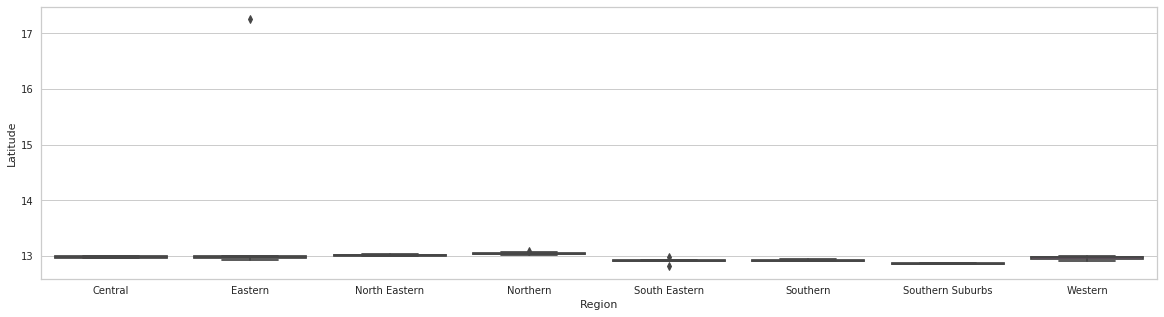

In [16]:
plt.figure(figsize=(20,5))
sns.boxplot(x=neighborhoods['Region'], y=neighborhoods['Latitude'], data=neighborhoods)

We can see an outlier in the Eastern regions. We will try getting rid of it

In [17]:
neighborhoods[neighborhoods['Region']=='Eastern']

,Region,Neighborhood,Latitude,Longitude
0,Eastern,Bellandur,12.979120,77.591300
1,Eastern,CV Raman Nagar,17.251068,80.165198
2,Eastern,Hoodi,12.991903,77.716201
3,Eastern,Krishnarajapuram,13.000509,77.675394
4,Eastern,Mahadevapura,12.993498,77.692416
5,Eastern,Marathahalli,12.955257,77.698416
6,Eastern,Varthur,12.940615,77.746994
7,Eastern,Whitefield,12.996400,77.761423


A variation of 5 degrees in latitude for a neighborhood in the same city is erroneous, therefore we can Google it and replace it with the correct value

In [18]:
neighborhoods.loc[neighborhoods['Neighborhood']=='CV Raman Nagar','Latitude'] = 12.9793
neighborhoods.loc[neighborhoods['Neighborhood']=='CV Raman Nagar','Longitude'] = 77.6642

In [19]:
neighborhoods[neighborhoods['Region']=='Eastern']

,Region,Neighborhood,Latitude,Longitude
0,Eastern,Bellandur,12.979120,77.591300
1,Eastern,CV Raman Nagar,12.979300,77.664200
2,Eastern,Hoodi,12.991903,77.716201
3,Eastern,Krishnarajapuram,13.000509,77.675394
4,Eastern,Mahadevapura,12.993498,77.692416
5,Eastern,Marathahalli,12.955257,77.698416
6,Eastern,Varthur,12.940615,77.746994
7,Eastern,Whitefield,12.996400,77.761423


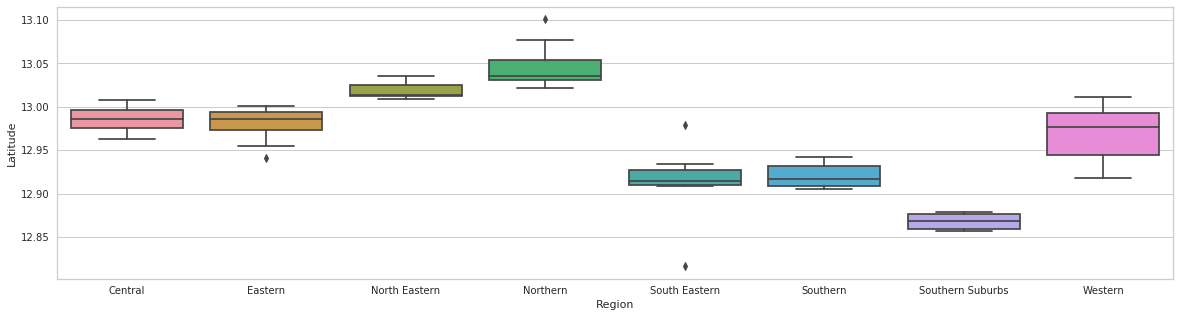

In [20]:
plt.figure(figsize=(20,5))
sns.boxplot(x=neighborhoods['Region'], y=neighborhoods['Latitude'], data=neighborhoods)

Since the variation of latitudes in the city is within 12.85-13.10 degrees, it is safe to say that all the coordinates are correct

To double check the coordinates, we will now examine the boxplot for longitudes

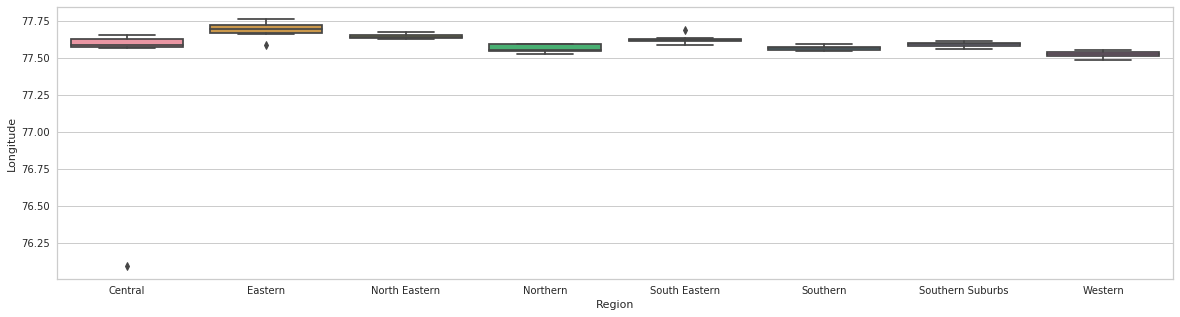

In [21]:
plt.figure(figsize=(20,5))
sns.boxplot(x=neighborhoods['Region'], y=neighborhoods['Longitude'], data=neighborhoods)

In [22]:
neighborhoods[neighborhoods['Longitude'] <=76.25]

,Region,Neighborhood,Latitude,Longitude
5,Central,Pete,12.999656,76.093298


We find one last outlier, therefore we can google the correct coordinates and enter them

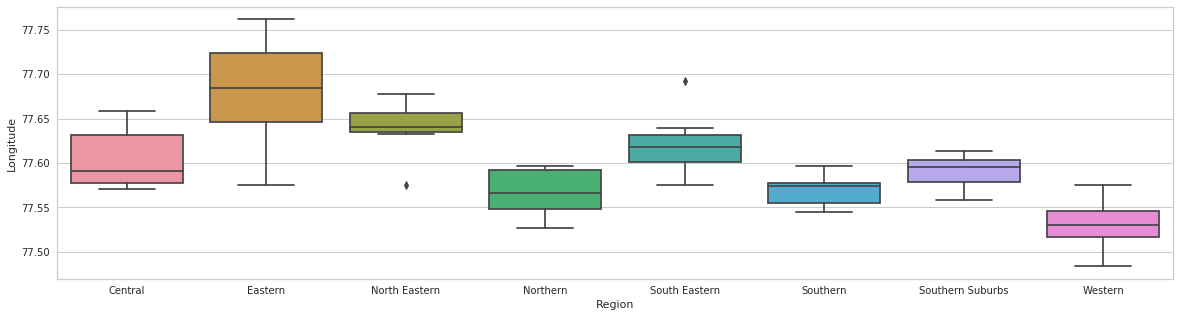

In [23]:
neighborhoods.loc[5, 'Latitude'] = 12.9627 
neighborhoods.loc[5, 'Longitude'] = 77.5758
plt.figure(figsize=(20,5))
sns.boxplot(x=neighborhoods['Region'], y=neighborhoods['Longitude'], data=neighborhoods)

Now the variation in longitudes is between 77.50 and 77.75, there it is now safe to say that all the coordinates are correct.

Our dataframe is now ready

In [24]:
neighborhoods.head()

,Region,Neighborhood,Latitude,Longitude
0,Central,Cantonment,12.979120,77.591300
1,Central,Domlur,12.962467,77.638196
2,Central,Indiranagar,12.973291,77.640467
3,Central,Jeevanbheemanagar,12.964200,77.658100
4,Central,Malleswaram,13.002735,77.570325


Now let's find the coordinates of Bangalore City, so that we can centre the map around that.

In [25]:
Bangalore_location = geolocator.geocode('Bangalore')
Latitude = Bangalore_location.latitude
Longitude = Bangalore_location.longitude
print('The coordinates of Bangalore are {},{}'.format(Latitude, Longitude))

The coordinates of Bangalore are 12.9791198,77.5912997


Let's plot all the neighborhoods on the map

In [26]:
bangalore_map = folium.Map(location=[Latitude, Longitude], zoom_start=10)

for lat, long, neighborhood, region in zip(neighborhoods['Latitude'] , neighborhoods['Longitude'] , neighborhoods['Neighborhood'], neighborhoods['Region']):
    
    label = '{}, {}'.format(neighborhood, region)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(location=[lat, long],
                                 popup=label,
                                 color='blue',
                                 fill=True,
                                 fill_color='#3186cc',
                                 fill_opacity=0.5,
                                 radius=5,
                                 parse_html=False).add_to(bangalore_map)


bangalore_map

## Getting the venues in all the neighborhoods in all the boroughs

We will enter our credentials to use Foursquare API

In [27]:
CLIENT_ID = 'WEZXAWILCFJJGUQME54IOZAU4HTTOW2UJCM4IBQQW0BAB2PL' # your Foursquare ID
CLIENT_SECRET = 'CHCA3UMMDMMYJM4SMKPSSIC0ORVW5L4S0N1QHYM2HUZHHOGF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

Let's retrieve the json file for the required neighborhoods and their venues, from Foursquare

In [28]:
RADIUS = 500
LIMIT = 500
venues_list = []
for name, lat, lng in zip(neighborhoods['Neighborhood'], neighborhoods['Latitude'], neighborhoods['Longitude']):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            RADIUS, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        for v in results:
            
            venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'])])
        
        
venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment,12.979120,77.591300,Vidhana Soudha,12.979027,77.591881,Capitol Building
1,Cantonment,12.979120,77.591300,Cubbon Park,12.977042,77.595277,Park
2,Cantonment,12.979120,77.591300,Vasudev Adigas High Court Of Karnataka,12.978967,77.593566,Indian Restaurant
3,Cantonment,12.979120,77.591300,Quiznos @ Inorbit Mall,12.979608,77.587360,Sandwich Place
4,Cantonment,12.979120,77.591300,Karnataka Fisheries Corporation Fish Canteen,12.975683,77.588325,Restaurant
...,...,...,...,...,...,...,...
668,Rajarajeshwari Nagar,12.927441,77.515522,Paakashaala,12.930141,77.515093,Indian Restaurant
669,Rajarajeshwari Nagar,12.927441,77.515522,Fitness Five,12.924595,77.518544,Gym
670,Vijayanagar,12.971889,77.545789,D-Mart,12.974412,77.547368,Department Store
671,Vijayanagar,12.971889,77.545789,"Natti style, vijayanagar",12.972908,77.544356,Indian Restaurant


We will now group the data bu neighborhoods to see how many different categories exist in each neighborhood

In [29]:
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Anjanapura,1,1,1,1,1,1
Arekere,3,3,3,3,3,3
BTM Layout,34,34,34,34,34,34
Banashankari,4,4,4,4,4,4
Banaswadi,6,6,6,6,6,6
...,...,...,...,...,...,...
Vidyaranyapura,5,5,5,5,5,5
Vijayanagar,3,3,3,3,3,3
Whitefield,7,7,7,7,7,7


In [30]:
print('There are {} uniques categories.'.format(venues['Venue Category'].nunique()))

There are 136 uniques categories.


Now we will use one hot encoding so that we get a numerical value attached to the frequency of occurrence of each kind of category in every neighborhood

In [31]:
# one hot encoding
venues_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")


# add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = venues['Neighborhood'] 


# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])

venues_onehot = venues_onehot[fixed_columns]
venues_onehot

,Neighborhood,ATM,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Tea Room,Temple,Tex-Mex Restaurant,Theme Park,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store,Yoga Studio
0,Cantonment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cantonment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cantonment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cantonment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cantonment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,Rajarajeshwari Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
669,Rajarajeshwari Nagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
670,Vijayanagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
671,Vijayanagar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We will now take their mean. The values below show the exact frequency of occurrence of each category in every neighborhood

In [32]:
venues_grouped = venues_onehot.groupby('Neighborhood').mean().reset_index()
venues_grouped

,Neighborhood,ATM,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Tea Room,Temple,Tex-Mex Restaurant,Theme Park,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store,Yoga Studio
0,Anjanapura,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,Arekere,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,BTM Layout,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.088235,0.0,0.0,0.0
3,Banashankari,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,Banaswadi,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.333333,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Vidyaranyapura,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
61,Vijayanagar,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
62,Whitefield,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.142857,0.0,0.000000,0.0,0.0,0.0
63,Yelahanka,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.333333,0.0,0.000000,0.0,0.0,0.0


Now we will create a function which takes individual rows for each neighborhood and sorts the 10 most common venues in descending order.

In [33]:
def get_common_venues(row, n_venues):
    
    row_categories = row.iloc[1:]
    row_sorted = row_categories.sort_values(ascending=False)
    return row_sorted.index.values[0:n_venues]

Let's create a dataframe

In [34]:
suffix = ['st', 'nd', 'rd']
columns = ['Neighborhood']


for i in range(1,11):
    
    try:
        columns.append('{}{} most common venue'.format(i,suffix[i-1]))
        
    except:
        columns.append('{}th most common venue'.format(i))
        

        
category_sorted = pd.DataFrame(columns=columns)        
        
    
    
category_sorted

,Neighborhood,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue


Now let's fill the dataframe

In [35]:
category_sorted['Neighborhood'] = venues_grouped['Neighborhood']

for i in np.arange(venues_grouped.shape[0]):
    
    category_sorted.iloc[i, 1:] = get_common_venues(venues_grouped.iloc[i,:], 10)
    

category_sorted.head()  

,Neighborhood,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
0,Anjanapura,Pool,Yoga Studio,Dim Sum Restaurant,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Donut Shop,Diner,Dessert Shop
1,Arekere,Restaurant,Badminton Court,Lake,Food Court,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Donut Shop,Yoga Studio
2,BTM Layout,Indian Restaurant,Ice Cream Shop,Snack Place,Vegetarian / Vegan Restaurant,Bakery,Chinese Restaurant,Fast Food Restaurant,Sandwich Place,Coffee Shop,Italian Restaurant
3,Banashankari,Juice Bar,Indian Restaurant,Liquor Store,Metro Station,Donut Shop,Food & Drink Shop,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store
4,Banaswadi,Vegetarian / Vegan Restaurant,Indian Restaurant,Juice Bar,BBQ Joint,Diner,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Donut Shop


In [36]:
category_sorted.shape

(65, 11)

## Clustering the neighborhoods based on the venues

In [37]:
cluster_df = venues_grouped.iloc[:, 1:]
cluster_df.head()

,ATM,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Tea Room,Temple,Tex-Mex Restaurant,Theme Park,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store,Yoga Studio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.088235,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0


In [38]:
cluster_df.shape

(65, 136)

We will use the KElbowVisualizer function in the yellowbrick package to find the optimum value of K for clustering

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


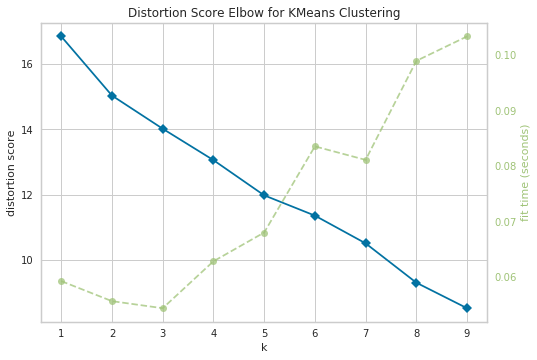

In [39]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=range(1,10))
visualizer.fit(cluster_df)
visualizer.show()

We obtain the elbow point at k=3. Therefore we will perform K-means clustering for k=3

In [40]:
k = 3   # No. of clusters 
k_means = KMeans(n_clusters=k, random_state=4)

In [41]:
clustering = k_means.fit(cluster_df)
cluster_label = clustering.labels_ 
cluster_label

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 1, 1,
       2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1],
      dtype=int32)

In [42]:
clustered_neigborhoods = category_sorted
clustered_neigborhoods['Cluster'] = cluster_label
clustered_neigborhoods

,Neighborhood,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue,Cluster
0,Anjanapura,Pool,Yoga Studio,Dim Sum Restaurant,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Donut Shop,Diner,Dessert Shop,1
1,Arekere,Restaurant,Badminton Court,Lake,Food Court,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Donut Shop,Yoga Studio,1
2,BTM Layout,Indian Restaurant,Ice Cream Shop,Snack Place,Vegetarian / Vegan Restaurant,Bakery,Chinese Restaurant,Fast Food Restaurant,Sandwich Place,Coffee Shop,Italian Restaurant,0
3,Banashankari,Juice Bar,Indian Restaurant,Liquor Store,Metro Station,Donut Shop,Food & Drink Shop,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,0
4,Banaswadi,Vegetarian / Vegan Restaurant,Indian Restaurant,Juice Bar,BBQ Joint,Diner,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Donut Shop,0
...,...,...,...,...,...,...,...,...,...,...,...,...
60,Vidyaranyapura,Market,Indian Restaurant,Historic Site,Bookstore,Yoga Studio,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,2
61,Vijayanagar,Indian Restaurant,Playground,Department Store,Yoga Studio,Diner,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Donut Shop,0
62,Whitefield,Park,Bus Station,Train Station,Restaurant,Platform,Playground,Supermarket,Department Store,Donut Shop,Diner,1
63,Yelahanka,ATM,Train Station,Motorcycle Shop,Diner,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Donut Shop,Dim Sum Restaurant,1


In [43]:
# To see the no. of neighborhoods in each cluster
cluster_dist = pd.DataFrame(clustered_neigborhoods.groupby('Cluster')['Neighborhood'].count())
cluster_dist

,Neighborhood
Cluster,
0,26
1,31
2,8


Let's see the distribution of the neighborhoods over the 3 clusters

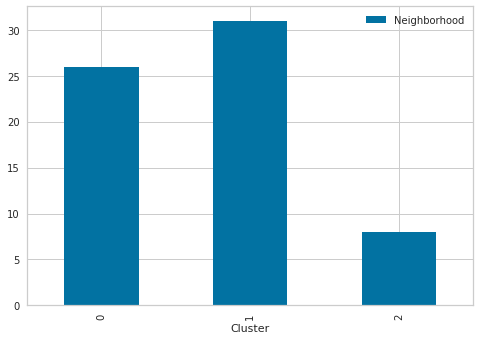

In [44]:
cluster_dist.plot(kind='bar')

Below is the final dataframe which has the all the regions, neighborhoods, their coordinates, the 10 most common venues in them and the clusters the neighborhoods lie in

In [45]:
final_df = pd.merge(neighborhoods, clustered_neigborhoods, how='right', on='Neighborhood')
final_df

,Region,Neighborhood,Latitude,Longitude,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue,Cluster
0,Central,Cantonment,12.979120,77.591300,Park,Indian Restaurant,Sandwich Place,Restaurant,Capitol Building,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Flea Market,0
1,Central,Domlur,12.962467,77.638196,Indian Restaurant,Café,Sports Bar,Liquor Store,Italian Restaurant,Restaurant,Lounge,Rajasthani Restaurant,Pub,Food & Drink Shop,0
2,Central,Indiranagar,12.973291,77.640467,Pub,Lounge,Ice Cream Shop,Cocktail Bar,Restaurant,Café,Cupcake Shop,Italian Restaurant,Indian Restaurant,Bakery,1
3,Central,Jeevanbheemanagar,12.964200,77.658100,Bakery,Yoga Studio,Donut Shop,Food & Drink Shop,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Diner,French Restaurant,1
4,Central,Malleswaram,13.002735,77.570325,Indian Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Coffee Shop,Fast Food Restaurant,Donut Shop,Other Nightlife,Snack Place,Café,Social Club,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Western,Nandini Layout,12.962700,77.575800,Market,Indian Restaurant,Historic Site,Bookstore,Yoga Studio,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,2
61,Western,Nayandahalli,12.941325,77.521212,Miscellaneous Shop,Yoga Studio,Diner,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Donut Shop,Dim Sum Restaurant,Hotel Bar,1
62,Western,Rajajinagar,12.988234,77.554883,Breakfast Spot,Paper / Office Supplies Store,Motorcycle Shop,Vegetarian / Vegan Restaurant,Indian Restaurant,Department Store,Clothing Store,Arts & Crafts Store,Mobile Phone Shop,Bakery,1
63,Western,Rajarajeshwari Nagar,12.927441,77.515522,Pizza Place,Breakfast Spot,Gym,Soccer Field,Indian Chinese Restaurant,Indian Restaurant,Japanese Restaurant,Lake,Food Court,Fast Food Restaurant,1


In [46]:
final_df.drop(['Cluster'], axis=1, inplace=True)

In [47]:
final_df.insert(4, 'Cluster', cluster_label)
final_df

,Region,Neighborhood,Latitude,Longitude,Cluster,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
0,Central,Cantonment,12.979120,77.591300,1,Park,Indian Restaurant,Sandwich Place,Restaurant,Capitol Building,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Flea Market
1,Central,Domlur,12.962467,77.638196,1,Indian Restaurant,Café,Sports Bar,Liquor Store,Italian Restaurant,Restaurant,Lounge,Rajasthani Restaurant,Pub,Food & Drink Shop
2,Central,Indiranagar,12.973291,77.640467,0,Pub,Lounge,Ice Cream Shop,Cocktail Bar,Restaurant,Café,Cupcake Shop,Italian Restaurant,Indian Restaurant,Bakery
3,Central,Jeevanbheemanagar,12.964200,77.658100,0,Bakery,Yoga Studio,Donut Shop,Food & Drink Shop,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Diner,French Restaurant
4,Central,Malleswaram,13.002735,77.570325,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Coffee Shop,Fast Food Restaurant,Donut Shop,Other Nightlife,Snack Place,Café,Social Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Western,Nandini Layout,12.962700,77.575800,2,Market,Indian Restaurant,Historic Site,Bookstore,Yoga Studio,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store
61,Western,Nayandahalli,12.941325,77.521212,0,Miscellaneous Shop,Yoga Studio,Diner,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Donut Shop,Dim Sum Restaurant,Hotel Bar
62,Western,Rajajinagar,12.988234,77.554883,1,Breakfast Spot,Paper / Office Supplies Store,Motorcycle Shop,Vegetarian / Vegan Restaurant,Indian Restaurant,Department Store,Clothing Store,Arts & Crafts Store,Mobile Phone Shop,Bakery
63,Western,Rajarajeshwari Nagar,12.927441,77.515522,1,Pizza Place,Breakfast Spot,Gym,Soccer Field,Indian Chinese Restaurant,Indian Restaurant,Japanese Restaurant,Lake,Food Court,Fast Food Restaurant


## Display of clusters on the map

In [48]:
# create map
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(final_df['Latitude'], final_df['Longitude'], final_df['Neighborhood'], final_df['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examining all the clusters

### Cluster 0

In [49]:
final_df.loc[final_df['Cluster']==0, final_df.columns[[1] + list(range(5, final_df.shape[1]))]]

,Neighborhood,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
2,Indiranagar,Pub,Lounge,Ice Cream Shop,Cocktail Bar,Restaurant,Café,Cupcake Shop,Italian Restaurant,Indian Restaurant,Bakery
3,Jeevanbheemanagar,Bakery,Yoga Studio,Donut Shop,Food & Drink Shop,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Diner,French Restaurant
4,Malleswaram,Indian Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Coffee Shop,Fast Food Restaurant,Donut Shop,Other Nightlife,Snack Place,Café,Social Club
5,Pete,Market,Indian Restaurant,Historic Site,Bookstore,Yoga Studio,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store
8,Shivajinagar,Indian Restaurant,Men's Store,Donut Shop,Market,Clothing Store,Fast Food Restaurant,Asian Restaurant,Tea Room,South Indian Restaurant,Yoga Studio
9,Ulsoor,Hotel,Indian Restaurant,Café,Light Rail Station,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Diner
11,Bellandur,Park,Indian Restaurant,Sandwich Place,Restaurant,Capitol Building,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Flea Market
12,CV Raman Nagar,Indian Restaurant,Bakery,Coffee Shop,Smoke Shop,Donut Shop,Food & Drink Shop,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store
13,Hoodi,Indian Restaurant,Yoga Studio,Dim Sum Restaurant,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Donut Shop,Diner,Dessert Shop
14,Krishnarajapuram,Fast Food Restaurant,Indian Restaurant,Train Station,Liquor Store,Movie Theater,Yoga Studio,Donut Shop,Flea Market,Farmers Market,Electronics Store


### Cluster 1

In [50]:
final_df.loc[final_df['Cluster']==1, final_df.columns[[1] + list(range(5, final_df.shape[1]))]]

,Neighborhood,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
0,Cantonment,Park,Indian Restaurant,Sandwich Place,Restaurant,Capitol Building,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Flea Market
1,Domlur,Indian Restaurant,Café,Sports Bar,Liquor Store,Italian Restaurant,Restaurant,Lounge,Rajasthani Restaurant,Pub,Food & Drink Shop
6,Sadashivanagar,Coffee Shop,Indian Restaurant,Department Store,Café,Seafood Restaurant,Women's Store,Gym,Gourmet Shop,Dessert Shop,Performing Arts Venue
7,Seshadripuram,Clothing Store,Indian Restaurant,Coffee Shop,Department Store,Fast Food Restaurant,Juice Bar,Chaat Place,Shopping Mall,Restaurant,Miscellaneous Shop
10,Vasanth Nagar,Hotel,Indian Restaurant,Nightclub,Coffee Shop,Golf Course,Vietnamese Restaurant,Hotel Bar,Gym,Art Gallery,Art Museum
15,Mahadevapura,Coffee Shop,Movie Theater,Bar,Noodle House,Clothing Store,Multiplex,Fast Food Restaurant,Shopping Mall,French Restaurant,Convenience Store
17,Varthur,Candy Store,Department Store,Yoga Studio,Food & Drink Shop,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Donut Shop,Diner
21,Horamavu,Snack Place,Athletics & Sports,Chinese Restaurant,Construction & Landscaping,Gym / Fitness Center,Gym,Cosmetics Shop,Cricket Ground,Cupcake Shop,Deli / Bodega
22,Kalyan Nagar,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,BBQ Joint,Korean Restaurant,Coffee Shop,Café,Restaurant,Electronics Store,Snack Place
23,Kammanahalli,Pizza Place,Diner,Bar,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Donut Shop,Dim Sum Restaurant,Food Court


### Cluster 2

In [51]:
final_df.loc[final_df['Cluster']==2, final_df.columns[[1] + list(range(5, final_df.shape[1]))]]

,Neighborhood,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
32,Yelahanka,ATM,Train Station,Motorcycle Shop,Diner,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Donut Shop,Dim Sum Restaurant
33,Yeshwanthpur,Bus Station,Train Station,Indian Restaurant,Fast Food Restaurant,Multiplex,Asian Restaurant,Light Rail Station,Miscellaneous Shop,Movie Theater,Shopping Mall
35,Bommasandra,Sporting Goods Shop,Yoga Studio,Diner,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Donut Shop,Dim Sum Restaurant,Food Court
36,BTM Layout,Indian Restaurant,Ice Cream Shop,Snack Place,Vegetarian / Vegan Restaurant,Bakery,Chinese Restaurant,Fast Food Restaurant,Sandwich Place,Coffee Shop,Italian Restaurant
41,Banashankari,Juice Bar,Indian Restaurant,Liquor Store,Metro Station,Donut Shop,Food & Drink Shop,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store
44,J. P. Nagar,Indian Restaurant,Café,Pizza Place,Pub,Garden,Mediterranean Restaurant,Shopping Mall,Snack Place,Bookstore,South Indian Restaurant
48,Uttarahalli,Fast Food Restaurant,Department Store,Movie Theater,Electronics Store,Café,Yoga Studio,Donut Shop,Flea Market,Farmers Market,Diner
60,Nandini Layout,Market,Indian Restaurant,Historic Site,Bookstore,Yoga Studio,Donut Shop,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store
